In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import metrics

In [133]:
matches = pd.read_csv('train_test_pred_set.csv')

In [134]:
matches.head()

,season,team_1,team_2,Pitch_type,Difference_batting_strength,Difference_bowling_strength,result_bool
0,2019,RCB,CSK,tropical,-23.880606,-23.159566,0.0
1,2019,Hyderabad,Kolkata,tropical,-15.822214,11.048107,0.0
2,2019,Delhi,Mumbai,tropical,1.706071,1.557104,1.0
3,2019,Punjab,Rajasthan,dry,17.260833,-6.303058,1.0
4,2019,Delhi,CSK,dry,-11.597154,-9.455920,0.0


In [45]:
matches.iloc[len(matches)-5:len(matches)]

,season,team_1,team_2,Pitch_type,Difference_batting_strength,Difference_bowling_strength,result_bool
349,2020,RCB,Hyderabad,hot,49.499222,-0.648728,NaN
350,2020,CSK,Punjab,tropical,5.493826,33.320790,NaN
351,2020,Kolkata,Rajasthan,dry,15.169838,-6.331557,NaN
352,2020,Delhi,RCB,tropical,-12.453933,1.612938,NaN
353,2020,Hyderabad,Mumbai,hot,-62.829000,-2.040944,NaN


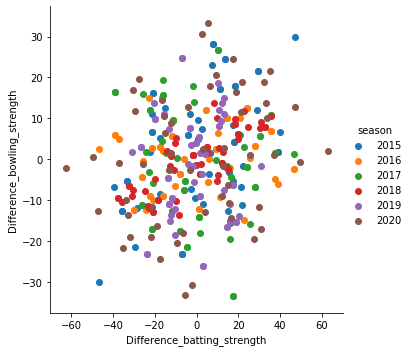

In [125]:
sns.FacetGrid(matches,hue='season',size=5)\
.map(plt.scatter,'Difference_batting_strength','Difference_bowling_strength')\
.add_legend()

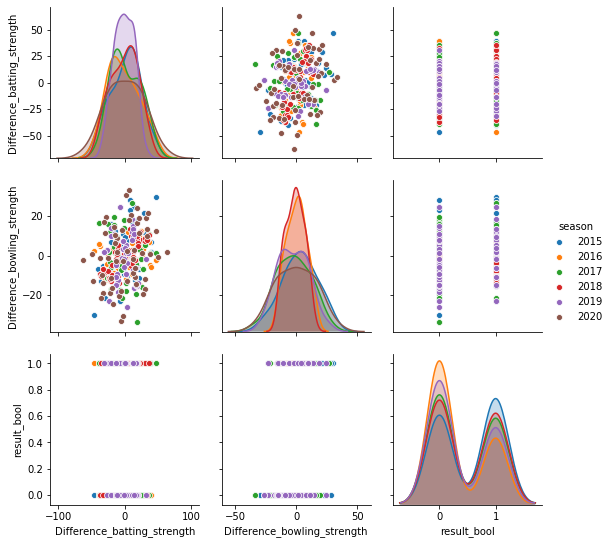

In [126]:
sns.pairplot(matches,hue='season')

In [51]:
matches[matches.season == 2020]

,season,team_1,team_2,Pitch_type,Difference_batting_strength,Difference_bowling_strength,result_bool
298,2020,Mumbai,CSK,tropical,29.743507,-11.716596,NaN
299,2020,Delhi,Punjab,dry,9.453622,20.527461,NaN
300,2020,Hyderabad,RCB,dry,-49.499222,0.648728,NaN
301,2020,Rajasthan,CSK,hot,-17.587509,-24.404761,NaN
302,2020,Kolkata,Mumbai,tropical,-32.161178,-19.019722,NaN
303,2020,Punjab,RCB,dry,-21.907556,-18.914523,NaN
304,2020,CSK,Delhi,dry,-3.959796,12.793329,NaN
305,2020,Kolkata,Hyderabad,tropical,30.667822,-16.978778,NaN
306,2020,Rajasthan,Punjab,hot,-12.093683,8.916029,NaN
307,2020,RCB,Mumbai,dry,-13.329778,-2.689672,NaN


In [52]:
matches_new = pd.get_dummies(matches, prefix=['Team_1', 'Team_2','Pitch_type'], columns=['team_1', 'team_2','Pitch_type'])

In [53]:
matches_new.head()

,season,Difference_batting_strength,Difference_bowling_strength,result_bool,Team_1_CSK,Team_1_Delhi,Team_1_Gujarat,Team_1_Hyderabad,Team_1_Kolkata,Team_1_Mumbai,...,Team_2_Kolkata,Team_2_Mumbai,Team_2_Pune,Team_2_Punjab,Team_2_RCB,Team_2_Rajasthan,Pitch_type_cool,Pitch_type_dry,Pitch_type_hot,Pitch_type_tropical
0,2019,-23.880606,-23.159566,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2019,-15.822214,11.048107,0.0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
2,2019,1.706071,1.557104,1.0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,2019,17.260833,-6.303058,1.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4,2019,-11.597154,-9.455920,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [61]:
test_train = matches_new[matches_new.season!= 2020]

In [63]:
pred = matches_new[matches_new.season== 2020]

In [71]:
test_train.shape

(298, 28)

In [70]:
pred.shape

(56, 28)

In [72]:
X = test_train.drop(['result_bool'], axis=1)
y = test_train["result_bool"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [74]:
X_train.shape,X_test.shape,y_train.shape, y_test.shape

((208, 27), (90, 27), (208,), (90,))

In [81]:
rf = RandomForestClassifier(n_estimators=100, max_depth=50,
                              random_state=0)
rf.fit(X_train, y_train) 


score = rf.score(X_train, y_train)
score2 = rf.score(X_test, y_test)


print("Training set accuracy: ", '%.3f'%(score))
print("Test set accuracy: ", '%.3f'%(score2))

Training set accuracy:  0.981
Test set accuracy:  0.578


In [77]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/Users/sahilmadaan12/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [95]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('Accuracy of Decision Tree Classifier is: ',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.63      0.58      0.60        55
         1.0       0.41      0.46      0.43        35

    accuracy                           0.53        90
   macro avg       0.52      0.52      0.52        90
weighted avg       0.54      0.53      0.54        90

[[32 23]
 [19 16]]
Accuracy of Decision Tree Classifier is:  0.5333333333333333


In [96]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('Accuracy of Gausian NaiveB is:',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.73      0.44      0.55        55
         1.0       0.46      0.74      0.57        35

    accuracy                           0.56        90
   macro avg       0.59      0.59      0.56        90
weighted avg       0.62      0.56      0.55        90

[[24 31]
 [ 9 26]]
Accuracy of Gausian NaiveB is: 0.5555555555555556


In [99]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('Accuracy of support vector machine model : ',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.61      1.00      0.76        55
         1.0       0.00      0.00      0.00        35

    accuracy                           0.61        90
   macro avg       0.31      0.50      0.38        90
weighted avg       0.37      0.61      0.46        90

[[55  0]
 [35  0]]
Accuracy of support vector machine model :  0.6111111111111112


/Users/sahilmadaan12/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [98]:
from sklearn.neighbors import  RadiusNeighborsClassifier
rnc=RadiusNeighborsClassifier(radius=18.0)
rnc.fit(X_train,y_train)
y_pred=rnc.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print('Accuracy of rnc model is: ', accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.64      0.84      0.72        55
         1.0       0.50      0.26      0.34        35

    accuracy                           0.61        90
   macro avg       0.57      0.55      0.53        90
weighted avg       0.58      0.61      0.57        90

[[46  9]
 [26  9]]
Accuracy of rnc model is:  0.6111111111111112


In [128]:
from sklearn.linear_model import PassiveAggressiveClassifier
pac = PassiveAggressiveClassifier()
pac.fit(X_train, y_train)
y_pred = pac.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('Accuracy of pac model is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        55
         1.0       0.39      1.00      0.56        35

    accuracy                           0.39        90
   macro avg       0.19      0.50      0.28        90
weighted avg       0.15      0.39      0.22        90

[[ 0 55]
 [ 0 35]]
Accuracy of pac model is 0.3888888888888889


/Users/sahilmadaan12/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [129]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
y_pred = bnb.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('Accuracy of bnb model is: ',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.67      0.64      0.65        55
         1.0       0.47      0.51      0.49        35

    accuracy                           0.59        90
   macro avg       0.57      0.58      0.57        90
weighted avg       0.60      0.59      0.59        90

[[35 20]
 [17 18]]
Accuracy of bnb model is:  0.5888888888888889


In [130]:
from sklearn.tree import ExtraTreeClassifier
etc = ExtraTreeClassifier()
etc.fit(X_train, y_train)
y_pred = etc.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('Accuracy of etc model is: ',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.65      0.62      0.64        55
         1.0       0.45      0.49      0.47        35

    accuracy                           0.57        90
   macro avg       0.55      0.55      0.55        90
weighted avg       0.57      0.57      0.57        90

[[34 21]
 [18 17]]
Accuracy of etc model is:  0.5666666666666667


In [109]:
from sklearn.ensemble import BaggingClassifier
bc=BaggingClassifier()
bc.fit(X_train,y_train)
y_pred=bc.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_pred,y_test))
print('Accuracy of bagging classifier model is: ',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.66      0.60      0.63        55
         1.0       0.45      0.51      0.48        35

    accuracy                           0.57        90
   macro avg       0.56      0.56      0.55        90
weighted avg       0.58      0.57      0.57        90

[[33 17]
 [22 18]]
Accuracy of bagging classifier model is:  0.5666666666666667


In [111]:
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier()
abc.fit(X_train,y_train)
y_pred=abc.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_pred,y_test))
print('Accuracy of AdaBoostClassifier model is: ',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.59      0.55      0.57        55
         1.0       0.36      0.40      0.38        35

    accuracy                           0.49        90
   macro avg       0.47      0.47      0.47        90
weighted avg       0.50      0.49      0.49        90

[[30 21]
 [25 14]]
Accuracy of AdaBoostClassifier model is:  0.4888888888888889


In [114]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(X_train,y_train)
y_pred=gbc.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_pred,y_test))
print('Accuracy of Gradient boosting classifier is ',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.66      0.64      0.65        55
         1.0       0.46      0.49      0.47        35

    accuracy                           0.58        90
   macro avg       0.56      0.56      0.56        90
weighted avg       0.58      0.58      0.58        90

[[35 18]
 [20 17]]
Accuracy of Gradient boosting classifier is  0.5777777777777777


In [116]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda=LinearDiscriminantAnalysis()
lda.fit(X_train,y_train)
y_pred=lda.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_pred,y_test))
print('Accuracy of lda model is: ',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.62      0.65      0.64        55
         1.0       0.41      0.37      0.39        35

    accuracy                           0.54        90
   macro avg       0.51      0.51      0.51        90
weighted avg       0.54      0.54      0.54        90

[[36 22]
 [19 13]]
Accuracy of lda model is:  0.5444444444444444


In [117]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda=QuadraticDiscriminantAnalysis()
qda.fit(X_train,y_train)
y_pred=qda.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_pred,y_test))
print('accuracy of qda model is:  ',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.68      0.58      0.63        55
         1.0       0.47      0.57      0.51        35

    accuracy                           0.58        90
   macro avg       0.57      0.58      0.57        90
weighted avg       0.60      0.58      0.58        90

[[32 15]
 [23 20]]
accuracy of qda model is:   0.5777777777777777


/Users/sahilmadaan12/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [135]:
matches_1 = pd.read_csv('IPL set - train_test_pred_set.csv')

In [136]:
matches_1.head()

,season,team_1,team_2,Pitch_type,Difference_batting_strength,Difference_bowling_strength,result_bool
0,2019,RCB,CSK,tropical,-34.376857,-26.622768,0.0
1,2019,Hyderabad,Kolkata,tropical,-19.692245,8.419899,0.0
2,2019,Delhi,Mumbai,tropical,-3.821286,4.875889,1.0
3,2019,Punjab,Rajasthan,dry,19.930902,-9.121005,1.0
4,2019,Delhi,CSK,dry,-22.908429,-17.429840,0.0


In [138]:
matches_team = matches_1[{"team_1","team_2"}]

In [162]:
matches_wt = matches_1.drop(["team_1","team_2","Pitch_type"],axis =1)

In [163]:
matches_wt

,season,Difference_batting_strength,Difference_bowling_strength,result_bool
0,2019,-34.376857,-26.622768,0.0
1,2019,-19.692245,8.419899,0.0
2,2019,-3.821286,4.875889,1.0
3,2019,19.930902,-9.121005,1.0
4,2019,-22.908429,-17.429840,0.0
...,...,...,...,...
349,2020,61.141758,-0.173791,NaN
350,2020,1.945479,43.795569,NaN
351,2020,20.952226,1.952974,NaN
352,2020,-14.502875,0.436570,NaN


In [143]:
matches_1_new = pd.get_dummies(matches_wt, prefix=['Pitch_type'], columns=['Pitch_type'])

In [144]:
matches_1_new

,season,Difference_batting_strength,Difference_bowling_strength,result_bool,Pitch_type_cool,Pitch_type_dry,Pitch_type_hot,Pitch_type_tropical
0,2019,-34.376857,-26.622768,0.0,0,0,0,1
1,2019,-19.692245,8.419899,0.0,0,0,0,1
2,2019,-3.821286,4.875889,1.0,0,0,0,1
3,2019,19.930902,-9.121005,1.0,0,1,0,0
4,2019,-22.908429,-17.429840,0.0,0,1,0,0
...,...,...,...,...,...,...,...,...
349,2020,61.141758,-0.173791,NaN,0,0,1,0
350,2020,1.945479,43.795569,NaN,0,0,0,1
351,2020,20.952226,1.952974,NaN,0,1,0,0
352,2020,-14.502875,0.436570,NaN,0,0,0,1


In [174]:
test_train = matches_wt[matches_new.season!= 2020]
pred = matches_wt[matches_new.season== 2020]
test_train = test_train.drop(['season'],axis =1)
pred = pred.drop(['season'], axis =1)
X = test_train.drop(['result_bool'], axis=1)
y = test_train["result_bool"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [175]:
X_train.shape,X_test.shape,y_train.shape, y_test.shape

((208, 2), (90, 2), (208,), (90,))

In [176]:
rf = RandomForestClassifier(n_estimators=200, max_depth=50,
                              random_state=0)
rf.fit(X_train, y_train) 


score = rf.score(X_train, y_train)
score2 = rf.score(X_test, y_test)


print("Training set accuracy: ", '%.3f'%(score))
print("Test set accuracy: ", '%.3f'%(score2))

Training set accuracy:  0.909
Test set accuracy:  0.478


In [177]:
from sklearn.neighbors import  RadiusNeighborsClassifier
rnc=RadiusNeighborsClassifier(radius=18.0)
rnc.fit(X_train,y_train)
y_pred=rnc.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print('Accuracy of rnc model is: ', accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.63      0.82      0.71        55
         1.0       0.47      0.26      0.33        35

    accuracy                           0.60        90
   macro avg       0.55      0.54      0.52        90
weighted avg       0.57      0.60      0.57        90

[[45 10]
 [26  9]]
Accuracy of rnc model is:  0.6


In [178]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

y_pred = logistic.predict(X_test)
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
print('Accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.68      0.80      0.73        55
         1.0       0.56      0.40      0.47        35

    accuracy                           0.64        90
   macro avg       0.62      0.60      0.60        90
weighted avg       0.63      0.64      0.63        90

[[44 11]
 [21 14]]
Accuracy is 0.6444444444444445


In [181]:
pred = pred.drop(['result_bool'], axis = 1)

In [190]:
result = logistic.predict(pred)

In [197]:
result_prob = pd.DataFrame(logistic.predict_proba(pred))

In [198]:
result_prob

,0,1
0,0.412816,0.587184
1,0.421512,0.578488
2,0.730429,0.269571
3,0.692017,0.307983
4,0.747314,0.252686
5,0.715987,0.284013
6,0.557489,0.442511
7,0.483585,0.516415
8,0.573794,0.426206
9,0.641033,0.358967
